## DATA VISUALIZATION AND DATA ANALYSIS

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ATTACK.csv')
df.head()

,FWT_TOT,PORT,PROCOLS,TTPE,SERVICE,FLOW_DURATION,BWD_TOT,FWT_DATA,BWD_DATA,DOWN_UP_RATION,FWD_SIZE,BWD_SIZE,FNN_FLAG,SYN_FLAG,RST_FLAG,PSH_FLAG,ACK_FLAG,URG_FLAG,Attack_type
0,9,38667,1883,tcp,mqtt,32.011598,5,3,3,0.555556,296,168,0,2,1,3,13,0,MQTT_Publish
1,9,51143,1883,tcp,mqtt,31.883584,5,3,3,0.555556,296,168,0,2,1,3,13,0,MQTT_Publish
2,9,44761,1883,tcp,mqtt,32.124053,5,3,3,0.555556,296,168,0,2,1,3,13,0,MQTT_Publish
3,9,60893,1883,tcp,mqtt,31.961063,5,3,3,0.555556,296,168,0,2,1,3,13,0,MQTT_Publish
4,9,51087,1883,tcp,mqtt,31.902362,5,3,3,0.555556,296,168,0,2,1,3,13,0,MQTT_Publish


In [3]:
df.columns

Index(['FWT_TOT', 'PORT', 'PROCOLS', 'TTPE', 'SERVICE', 'FLOW_DURATION',
       'BWD_TOT', 'FWT_DATA', 'BWD_DATA', 'DOWN_UP_RATION', 'FWD_SIZE',
       'BWD_SIZE', 'FNN_FLAG', 'SYN_FLAG', 'RST_FLAG', 'PSH_FLAG', 'ACK_FLAG',
       'URG_FLAG', 'Attack_type'],
      dtype='object')

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['Attack_type',"SERVICE","TTPE"]
  
for i in var:
    df[i] = le.fit_transform(df[i]).astype(int)

<Axes: xlabel='Attack_type', ylabel='count'>

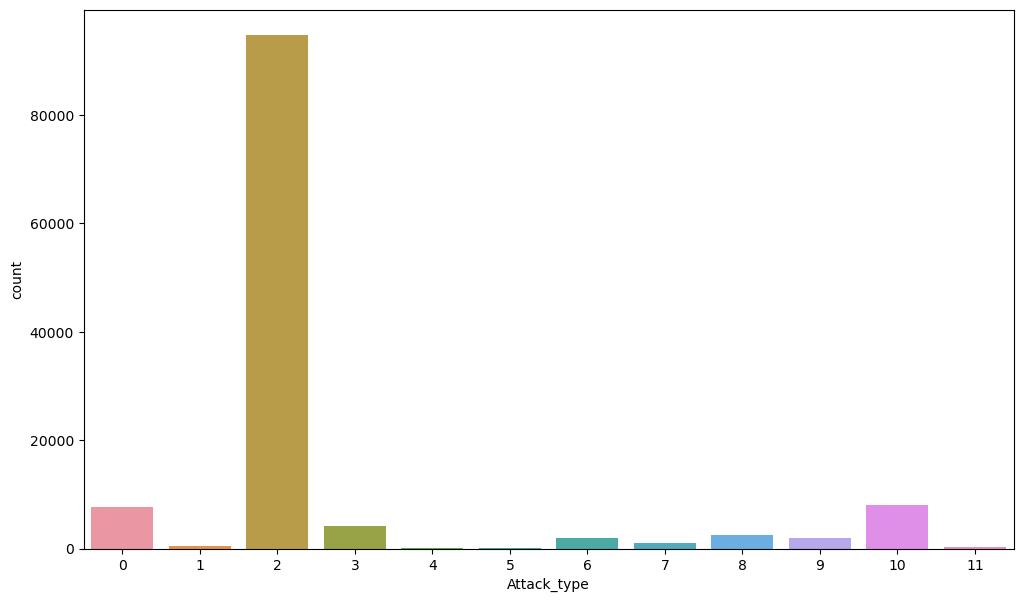

In [5]:
plt.figure(figsize=(12,7))
sns.countplot(x='Attack_type',data=df)

(array([1.23111e+05, 4.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([    0. ,  1011.2,  2022.4,  3033.6,  4044.8,  5056. ,  6067.2,
         7078.4,  8089.6,  9100.8, 10112. ]),
 <BarContainer object of 10 artists>)

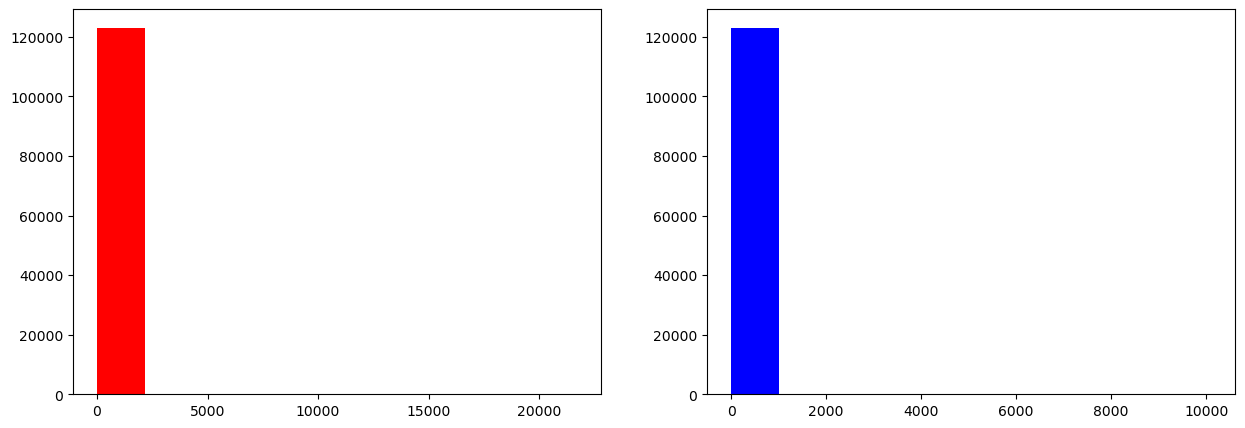

In [6]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(df['FLOW_DURATION'],color='red')

plt.subplot(1,2,2)
plt.hist(df['BWD_TOT'],color='blue')


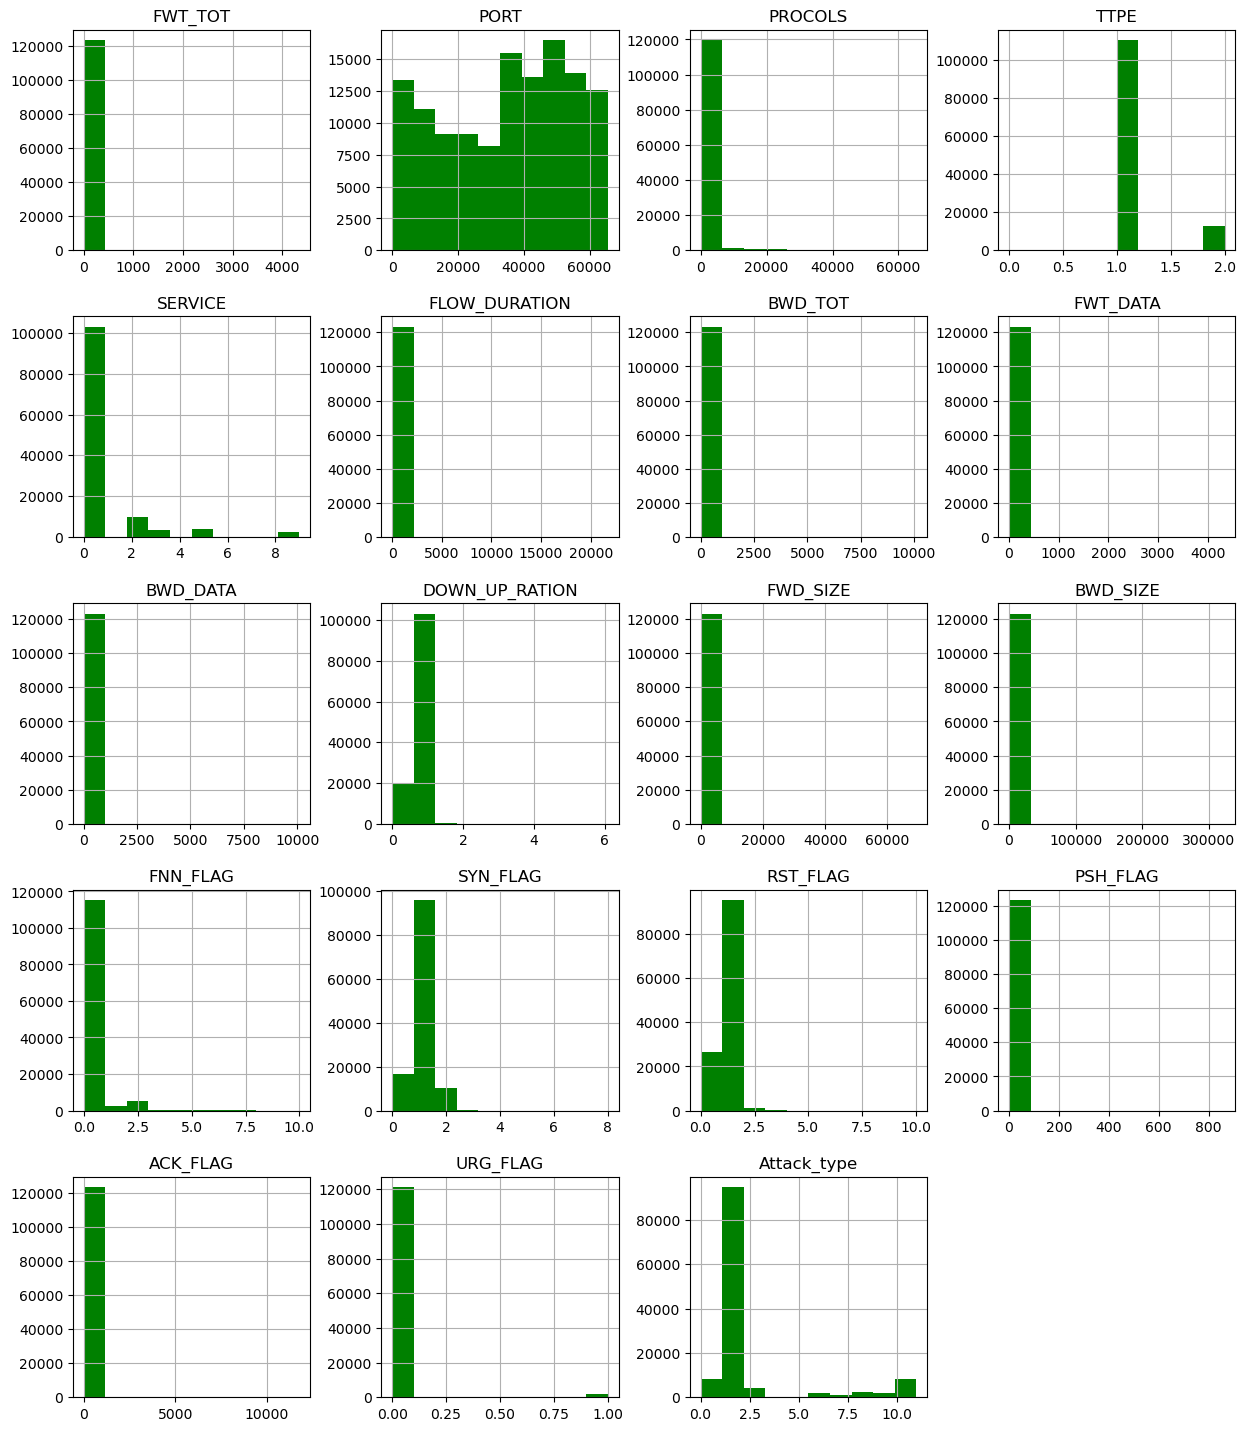

In [7]:
df.hist(figsize=(15,55),layout=(15,4), color='green')
plt.show()

<Axes: >

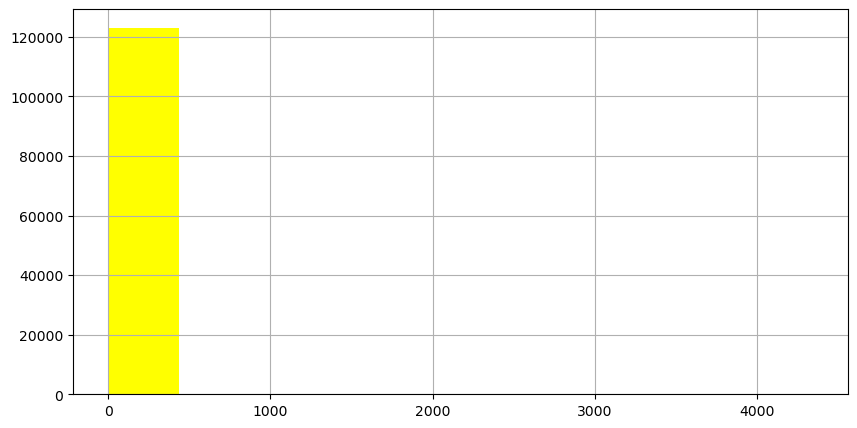

In [8]:
df['FWT_TOT'].hist(figsize=(10,5),color='yellow')

<Axes: ylabel='PORT'>

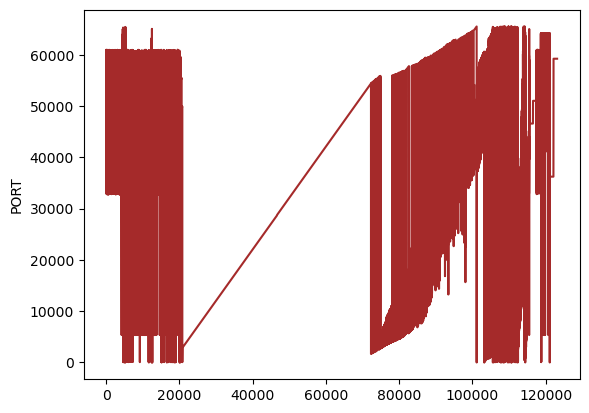

In [9]:
sns.lineplot(df['PORT'], color='brown') # scatter, plot, triplot, stackplot

<Axes: >

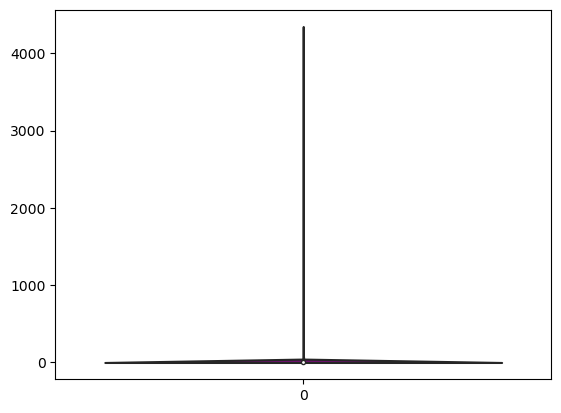

In [10]:
sns.violinplot(df['FWT_DATA'], color='purple') 

<Axes: ylabel='Density'>

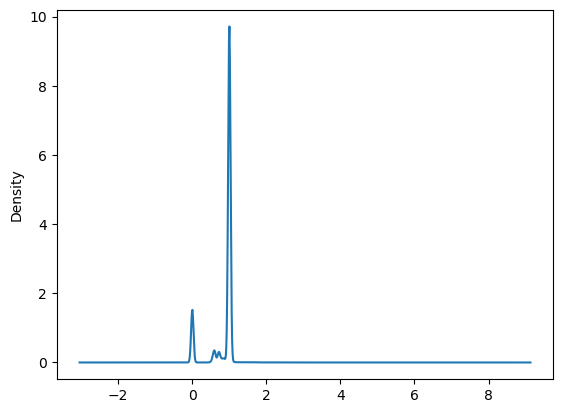

In [11]:
df['DOWN_UP_RATION'].plot(kind='density')

C:\Users\dodla\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


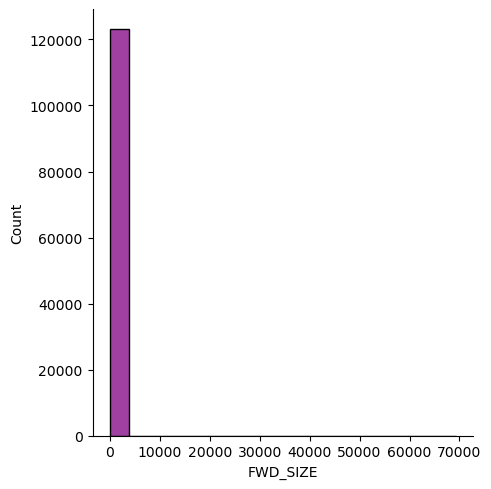

In [12]:
sns.displot(df['FWD_SIZE'], color='purple') 
# barplot, boxenplot, boxplot, countplot, displot, distplot, ecdfplot, histplot, kdeplot, pointplot, violinplot, stripplot

C:\Users\dodla\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


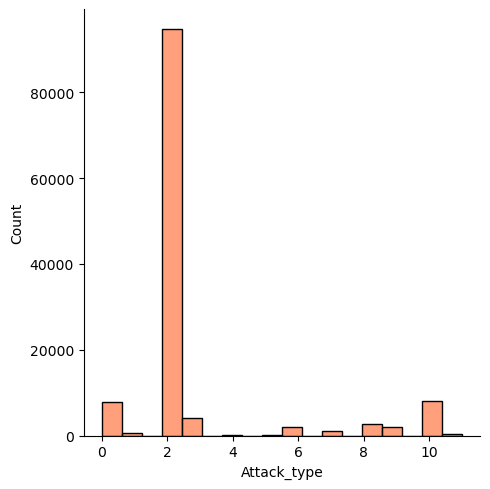

In [13]:
sns.displot(df['Attack_type'], color='coral') # residplot, scatterplot 

<Axes: >

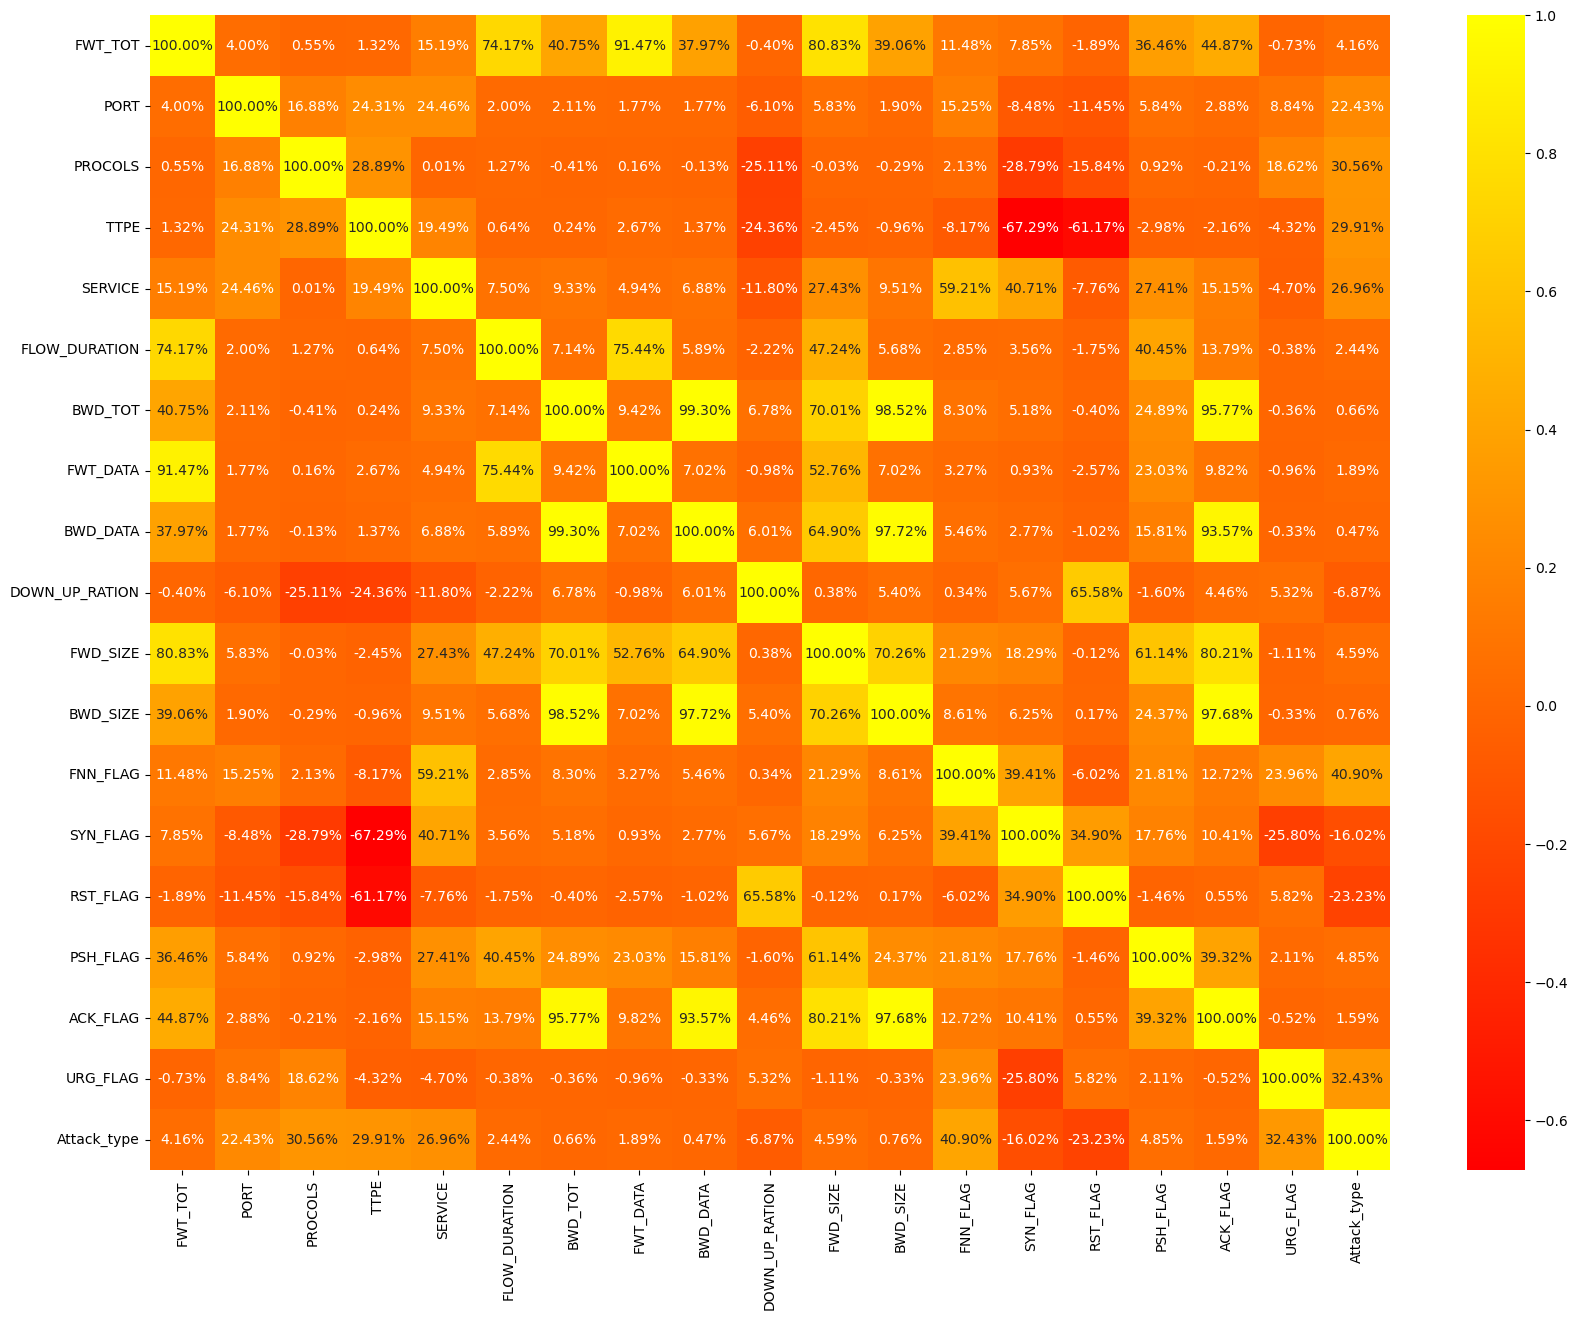

In [14]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),annot = True, fmt='0.2%',cmap = 'autumn',ax=ax)

Attack_type
2     76.89
10     6.59
0      6.29
3      3.37
8      2.10
9      1.63
6      1.62
7      0.81
1      0.43
11     0.21
4      0.03
5      0.02
Name: count, dtype: float64

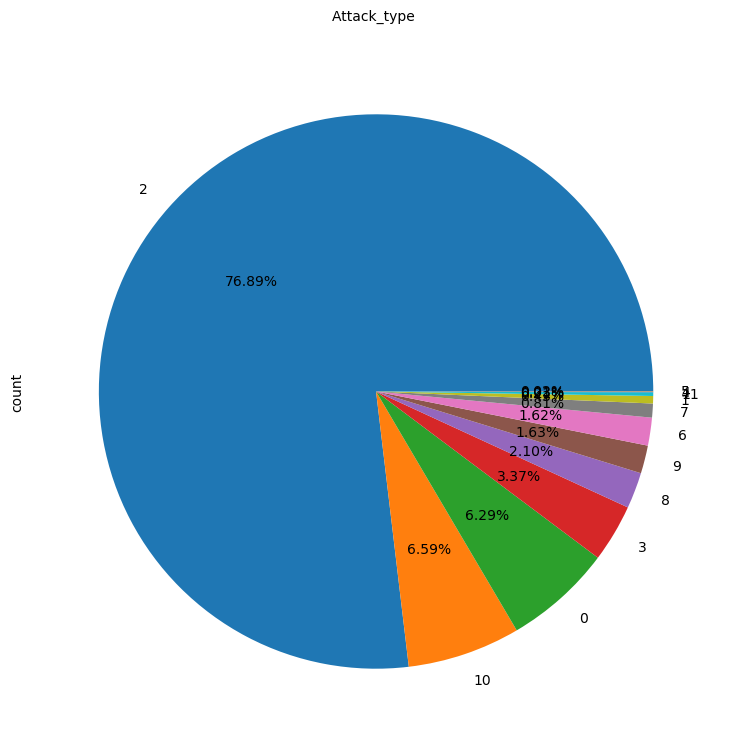

In [15]:
def plot(df, variable):
    dataframe_pie = df[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(9,9), autopct='%1.2f%%', fontsize = 10)
    ax.set_title(variable + ' \n', fontsize = 10)
    return np.round(dataframe_pie/df.shape[0]*100,2)

plot(df, 'Attack_type')